In [1]:
import pandas as pd

In [2]:
import math
print (22%16+1)

7


In [3]:
# Удалим pandas и все старые файлы
!pip uninstall pandas -y

# Очистим кэш
!rm -rf ~/.cache/pip

# Установим pandas снова
!pip install pandas

Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 61.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [4]:
import pandas as pd

In [5]:
  !git clone https://github.com/logpai/loghub

Cloning into 'loghub'...
remote: Enumerating objects: 575, done.
remote: Counting objects: 100% (174/174), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 575 (delta 146), reused 136 (delta 133), pack-reused 401 (from 1)
Receiving objects: 100% (575/575), 7.27 MiB | 8.71 MiB/s, done.
Resolving deltas: 100% (267/267), done.


In [6]:
!ls loghub


Android  CITATION  HealthApp  Linux    OpenStack  Spark        Zookeeper
Apache	 Hadoop    HPC	      Mac      Proxifier  Thunderbird
BGL	 HDFS	   LICENSE    OpenSSH  README.md  Windows


In [7]:
!ls loghub/HealthApp


HealthApp_2k.log  HealthApp_2k.log_structured.csv  HealthApp_2k.log_templates.csv  README.md


In [8]:
suroy_log = "loghub/HealthApp/HealthApp_2k.log"


In [9]:
with open(suroy_log, "r") as file:
    logs = file.read()

In [10]:
print("Проверка скачивания:")
print(logs)

Проверка скачивания:
20171223-22:15:29:606|Step_LSC|30002312|onStandStepChanged 3579
20171223-22:15:29:615|Step_LSC|30002312|onExtend:1514038530000 14 0 4
20171223-22:15:29:633|Step_StandReportReceiver|30002312|onReceive action: android.intent.action.SCREEN_ON
20171223-22:15:29:635|Step_LSC|30002312|processHandleBroadcastAction action:android.intent.action.SCREEN_ON
20171223-22:15:29:635|Step_StandStepCounter|30002312|flush sensor data
20171223-22:15:29:635|Step_SPUtils|30002312| getTodayTotalDetailSteps = 1514038440000##6993##548365##8661##12266##27164404
20171223-22:15:29:636|Step_SPUtils|30002312|setTodayTotalDetailSteps=1514038440000##7007##548365##8661##12361##27173954
20171223-22:15:29:636|Step_LSC|30002312|onStandStepChanged 3579
20171223-22:15:29:645|Step_ExtSDM|30002312|calculateCaloriesWithCache totalCalories=126775
20171223-22:15:29:648|Step_ExtSDM|30002312|calculateAltitudeWithCache totalAltitude=240
20171223-22:15:29:649|Step_StandReportReceiver|30002312|REPORT : 7007 5002

5 видов логов событий

20171223-22:15:29:606|Step_LSC|30002312|onStandStepChanged 3579

20171223-22:15:29:615|Step_LSC|30002312|onExtend:1514038530000 14 0 4

20171223-22:15:29:635|Step_StandStepCounter|30002312|flush sensor data

20171223-22:15:29:649|Step_StandReportReceiver|30002312|REPORT : 7007 5002 150089 240

20171223-22:15:34:723|Step_StandReportReceiver|30002312|onReceive action: android.intent.action.SCREEN_OFF

In [11]:
!pip install pandas numpy
import logging
import numpy as np
import re
import sqlite3

In [12]:

    # Общий формат лога
log_pattern = re.compile(r'(?P<timestamp>\d{8}-\d{2}:\d{2}:\d{2}:\d{3})\|(?P<step_name>\S+)\|(?P<device_id>\d+)\|(?P<event_data>.+)')



In [13]:
def setup_logging(output_file):
    logging.basicConfig(filename=output_file,
                        level=logging.INFO,  # Уровень логирования
                        format='%(message)s',  # Формат сообщения
                        filemode='w')  # Режим записи (перезапись файла)

In [14]:
# Функция для парсинга одной строки лога
def parse_log_line(line):
    match = log_pattern.match(line)
    if match:
        return match.groupdict()  # возвращаем словарь с нужными данными
    return None

In [15]:
def read_and_parse_logs(suroy_log):
    with open(suroy_log, 'r') as file:
        for line in file:
            parsed_log = parse_log_line(line)
            if parsed_log:
                # Форматированный вывод для каждого события
                print(f"Timestamp:  {parsed_log['timestamp']}")
                print(f"Step_ID :   {parsed_log['step_name']}")
                print(f"Device_id: {parsed_log['device_id']}")
                print(f"Message: {parsed_log['event_data']}")
                print("")  # Разделитель между событиями


In [16]:
print(read_and_parse_logs(suroy_log))

Выходные данные были обрезаны до нескольких последних строк (5000).
Step_ID :   Step_LSC
Device_id: 30002312
Message: onExtend:1514038645000 3 0 4

Timestamp:  20171223-22:17:25:150
Step_ID :   Step_SPUtils
Device_id: 30002312
Message:  getTodayTotalDetailSteps = 1514038560000##7071##548561##8661##16256##27288973

Timestamp:  20171223-22:17:25:151
Step_ID :   Step_SPUtils
Device_id: 30002312
Message: setTodayTotalDetailSteps=1514038560000##7074##548562##8661##16256##27289470

Timestamp:  20171223-22:17:25:159
Step_ID :   Step_ExtSDM
Device_id: 30002312
Message: calculateCaloriesWithCache totalCalories=128210

Timestamp:  20171223-22:17:25:162
Step_ID :   Step_ExtSDM
Device_id: 30002312
Message: calculateAltitudeWithCache totalAltitude=240

Timestamp:  20171223-22:17:25:163
Step_ID :   Step_StandReportReceiver
Device_id: 30002312
Message: REPORT : 7074 5050 151525 240

Timestamp:  20171223-22:17:27:855
Step_ID :   Step_LSC
Device_id: 30002312
Message: onStandStepChanged 3646

Timestamp:

In [17]:
# Пример использования
input_file = 'loghub/data/logs/HealthApp_2k.log'  # Путь к исходному лог-файлу
output_file = '/content/parsed_logs.txt'  # Путь к файлу, куда будет сохраняться вывод

In [18]:
try:
    with open(output_file, 'r') as file:
        file_content = file.read()
        print("Файл появился,всё работает")  #подтверждаю получение в файл данных
except FileNotFoundError:
    print(f"Файл {output_file} не найден. Убедитесь, что парсинг завершился успешно.")

Файл /content/parsed_logs.txt не найден. Убедитесь, что парсинг завершился успешно.


In [19]:

# Настроим логирование для записи в файл
def setup_logging(output_file):
    logging.basicConfig(filename=output_file,
                        level=logging.INFO,  # Уровень логирования
                        format='%(message)s',  # Формат сообщения
                        filemode='w')  # Режим записи (перезапись файла)

# Функция для парсинга одной строки лога
def parse_log_line(line):
    match = log_pattern.match(line)
    if match:
        return match.groupdict()  # возвращаем словарь с нужными данными
    return None

# Функция для создания таблицы в СУБД (SQLite)
def create_db():
    conn = sqlite3.connect('logs.db')  # Создаём или открываем базу данных
    cursor = conn.cursor()

    # Создание таблицы для логов
    cursor.execute('''CREATE TABLE IF NOT EXISTS logs (
        timestamp TEXT,
        step_name TEXT,
        device_id INTEGER,
        event_data TEXT
    )''')

    conn.commit()
    return conn, cursor

In [20]:
def insert_log_data(cursor, parsed_log):
    cursor.execute('''INSERT INTO logs (timestamp, step_name, device_id, event_data)
                      VALUES (?, ?, ?, ?)''',
                   (parsed_log['timestamp'], parsed_log['step_name'], parsed_log['device_id'], parsed_log['event_data']))

# Функция для чтения и нормализации логов
def read_and_normalize_logs(suroy_log, db_cursor):
    with open(suroy_log, 'r') as file:
        for line in file:
            parsed_log = parse_log_line(line)
            if parsed_log:
                insert_log_data(db_cursor, parsed_log)  # Вставляем данные в СУБД

In [21]:
input_file = 'loghub/HealthApp/HealthApp_2k.log'  # Путь к исходному лог-файлу

# Создаём базу данных и таблицу
conn, cursor = create_db()

# Нормализуем логи и сохраняем в БД
read_and_normalize_logs(input_file, cursor)

# Подтверждаем изменения и закрываем соединение
conn.commit()
conn.close()

print("Нормализация логов завершена, данные сохранены в базу данных.")

Нормализация логов завершена, данные сохранены в базу данных.


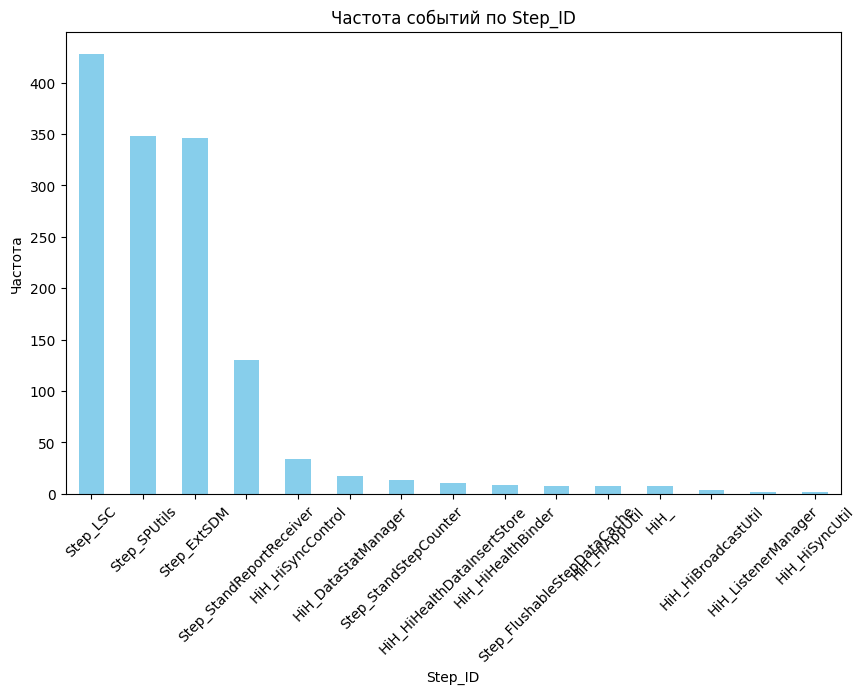

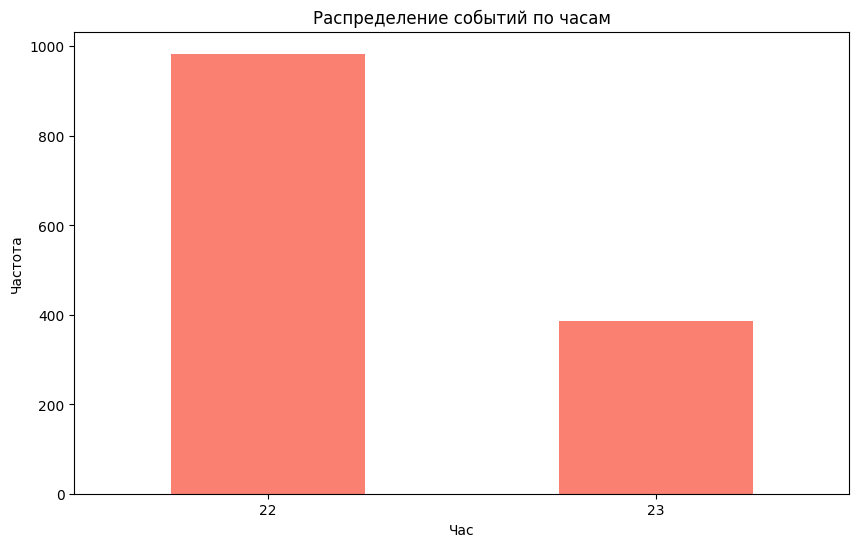

In [25]:
import matplotlib.pyplot as plt
# Чтение данных из базы данных
conn = sqlite3.connect('logs.db')
query = "SELECT * FROM logs"
df = pd.read_sql(query, conn)

# Закрываем соединение с БД
conn.close()

# Статистический анализ: частота событий по Step_ID (или Step Name)
step_counts = df['step_name'].value_counts()

# Визуализация частоты событий по Step_ID
plt.figure(figsize=(10, 6))
step_counts.plot(kind='bar', color='skyblue')
plt.title('Частота событий по Step_ID')
plt.xlabel('Step_ID')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()


# Анализ временных меток (timestamp)
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d-%H:%M:%S:%f')

# Визуализация распределения событий по часам
df['hour'] = df['timestamp'].dt.hour
hourly_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='salmon')
plt.title('Распределение событий по часам')
plt.xlabel('Час')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.show()